In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/customer_churn_data.csv")

In [3]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [4]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


#### EDA

In [37]:
duplicated_df = df[df.duplicated(keep = False)]
duplicated_df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,TotalCharges,TechSupport,Churn,InternetService_filled


In [6]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

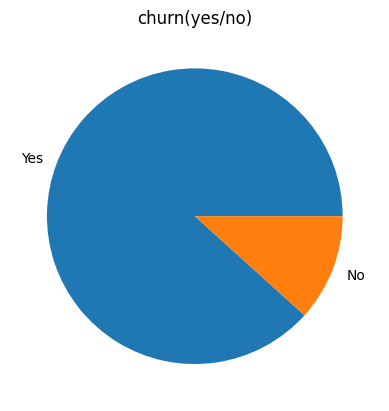

In [7]:
df["Churn"].value_counts().plot(kind='pie')
plt.title("churn(yes/no)")
plt.ylabel("")
plt.show()


In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [9]:
df.groupby(['Churn',"Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [10]:
df.groupby("Churn")['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [11]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [12]:
df["InternetService"].isna().sum()/len(df) * 100

np.float64(29.7)

In [ ]:
df["InternetService_filled"] = df["InternetService"].fillna("Unknown")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


### Relate categorical (object) features to target
#### How this relates object data to the target
**Goal:** show how each category changes the probability of churn.

**1) Turn the target into numbers**
`Churn` is text (`Yes`/`No`). We map it to 1/0 so averages become probabilities: the mean of 1/0 equals the churn rate.

**2) Group by each categorical column**
For each object column, we group rows by category and compute the mean of the numeric `Churn`. This answers: *“Given this category, what fraction churned?”*

> Example idea: If `InternetService = Fiber optic` has mean 0.45, then ~45% of those customers churned.

**3) Cross-tab for proportions**
A cross-tab counts how many `Yes`/`No` are in each category. With `normalize="index"`, each row sums to 1, so you see the share of churn within each category.

**Why this works**
- Mapping `Yes/No` → `1/0` makes the mean equal the probability of churn.
- Grouping by category isolates the relationship between that category and churn.
- Normalized cross-tabs make categories comparable even if they have different sizes.

In [29]:
# Create a numeric target without changing the original column
y = df["Churn"].replace({"Yes": 1, "No": 0})
cat_cols = df.select_dtypes(include=["object"]).columns.drop("Churn")

# Churn rate by category
for col in cat_cols:
    rate = df.groupby(col)["Churn"].apply(lambda s: s.replace({"Yes": 1, "No": 0}).mean())
    display(rate.sort_values(ascending=False).to_frame(name="churn_rate"))

# Normalized cross-tabs (share of churn per category)
for col in cat_cols:
    ct = pd.crosstab(df[col], df["Churn"], normalize="index")
    display(ct)

/tmp/ipykernel_191845/2948613421.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["Churn"].replace({"Yes": 1, "No": 0})
/tmp/ipykernel_191845/2948613421.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rate = df.groupby(col)["Churn"].apply(lambda s: s.replace({"Yes": 1, "No": 0}).mean())


,churn_rate
Gender,
Male,0.893939
Female,0.873606


/tmp/ipykernel_191845/2948613421.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rate = df.groupby(col)["Churn"].apply(lambda s: s.replace({"Yes": 1, "No": 0}).mean())


,churn_rate
ContractType,
Month-to-Month,1.000000
Two-Year,0.770000
One-Year,0.754325


/tmp/ipykernel_191845/2948613421.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rate = df.groupby(col)["Churn"].apply(lambda s: s.replace({"Yes": 1, "No": 0}).mean())


,churn_rate
InternetService,
DSL,0.844156
Fiber Optic,0.825316


/tmp/ipykernel_191845/2948613421.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rate = df.groupby(col)["Churn"].apply(lambda s: s.replace({"Yes": 1, "No": 0}).mean())


,churn_rate
TechSupport,
No,1.000000
Yes,0.768775


/tmp/ipykernel_191845/2948613421.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rate = df.groupby(col)["Churn"].apply(lambda s: s.replace({"Yes": 1, "No": 0}).mean())


,churn_rate
InternetService_filled,
unknown,1.000000
DSL,0.844156
Fiber Optic,0.825316


Churn,No,Yes
Gender,,
Female,0.126394,0.873606
Male,0.106061,0.893939


Churn,No,Yes
ContractType,,
Month-to-Month,0.000000,1.000000
One-Year,0.245675,0.754325
Two-Year,0.230000,0.770000


Churn,No,Yes
InternetService,,
DSL,0.155844,0.844156
Fiber Optic,0.174684,0.825316


Churn,No,Yes
TechSupport,,
No,0.000000,1.000000
Yes,0.231225,0.768775


Churn,No,Yes
InternetService_filled,,
DSL,0.155844,0.844156
Fiber Optic,0.174684,0.825316
unknown,0.000000,1.000000


In [30]:
df["InternetService_filled"].value_counts()
pd.crosstab(df["InternetService_filled"], df["Churn"])

Churn,No,Yes
InternetService_filled,,
DSL,48,260
Fiber Optic,69,326
unknown,0,297


In [34]:
df.drop("InternetService", axis = 1, inplace = True)

In [35]:
cat_cols = df.select_dtypes(include = ["object"]).columns
card = df[cat_cols].nunique().sort_values()
decision = pd.DataFrame({"cardinality": card, "ohe": card <= 10})
display(decision)

,cardinality,ohe
Gender,2,True
TechSupport,2,True
Churn,2,True
ContractType,3,True
InternetService_filled,3,True


In [36]:
ohe_cols = decision.loc[(decision["ohe"]) & (decision.index !="Churn" )].index.tolist()
print("OHE columns:", ohe_cols)

OHE columns: ['Gender', 'TechSupport', 'ContractType', 'InternetService_filled']


In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
y = df["Churn"].replace({"Yes":1, "No": 0})
X = df.drop(columns = ["Churn"])

cat_cols = ohe_cols
num_cols = [col for col in X.columns if col not in cat_cols]

print("Catagorical colums", cat_cols)
print("numerical columns", num_cols)

Catagorical colums ['Gender', 'TechSupport', 'ContractType', 'InternetService_filled']
numerical columns ['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']


In [50]:
process = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(drop = "first", handle_unknown = "ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)

In [51]:
process

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [54]:
log_reg = LogisticRegression(max_iter = 100) #penality l2 y default

clf = Pipeline(steps = [
    ("process", process),
    ("model", log_reg)
])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

In [57]:
clf.fit(X_train, y_train)

,steps,"[('process', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
